# Plotting networks

In this notebook, we'll look at a few ways to plot networks: mainly, by directly plotting the adjacency matrix or via network layouts.

## Plotting adjacency matricies

Lets start by plotting a very simple network - this happens to be one of the most famous toy datasets in network science, the Karate Club dataset. 

In [36]:
import networkx as nx 

g = nx.karate_club_graph()

First, we'll extract the adjacency matrix representation.

In [37]:
nodelist = list(g.nodes)

A = nx.to_numpy_array(g, nodelist=nodelist)

A

array([[0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

We can plot the the adjacency matrix using a visualization commonly called a heatmap, 
for instance, using the `heatmap` function from `seaborn`.

<AxesSubplot:>

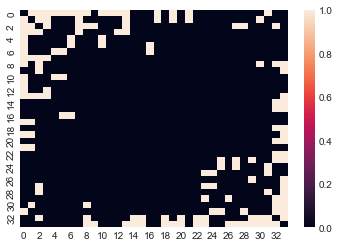

In [38]:
import seaborn as sns 

sns.heatmap(A)

We can also use the heatmap function in `graspologic`, which essentially just wraps that
of `seaborn` and adds a few useful features when plotting adjacency matrices. You can read 
more about these in the [`graspologic` documentation for `heatmap`](https://microsoft.github.io/graspologic/latest/reference/reference/plotting.html#heatmap).

<AxesSubplot:>

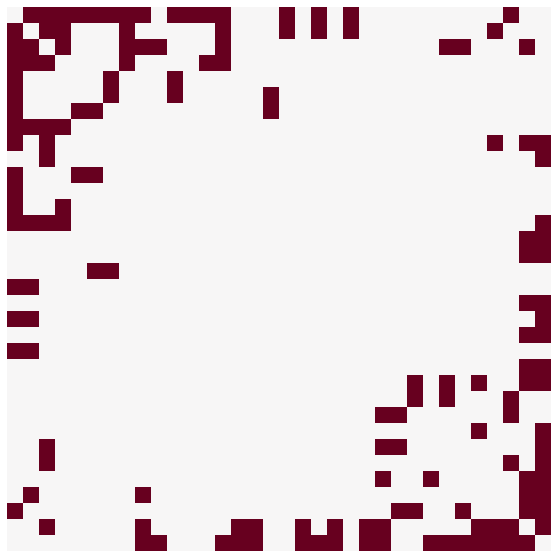

In [39]:
from graspologic.plot import heatmap

heatmap(A, cbar=False)

As we mentioned in [](representing_networks.ipynb), any permutation of this 
adjacency matrix represents the same graph. Let's see how this same plot looks with a 
different permutation.

In [40]:
# generate a random permutation 

import numpy as np 

rng = np.random.default_rng(8888)

n = len(A) # n is the number of nodes
perm = rng.permutation(n)

perm

array([ 1, 12,  9,  2,  0, 13, 30,  7, 24, 28, 16, 14, 32, 15, 17, 10,  4,
       33,  5, 27, 26, 29, 18, 19,  3, 21, 25, 31, 11, 23,  6,  8, 20, 22])

<AxesSubplot:>

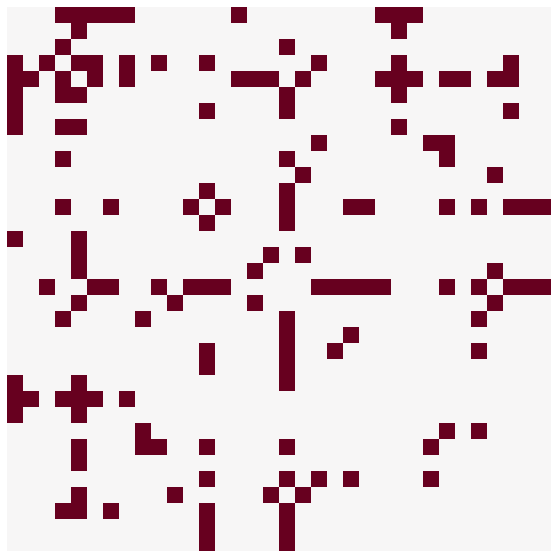

In [41]:
A_perm = A[perm][:, perm]

heatmap(A_perm, cbar=False)

This highlights part of why plotting with adjacency matrices can be difficult - depending
on the permutation you use, the perception of the network can be very different. It is important
to keep this in mind when plotting or looking at plots of adjacency matrices. 

Often, it can be a good idea to have some specific way to sort the adjacency matrix - here, I infer some groups or communities in the network, and then use those as a partition of the adjacency matrix. I also sort the nodes in order within each community in descending order by degree. We'll talk more about both of these concepts later in the course. 

In [42]:
from graspologic.partition import leiden

partition_map = leiden(g, trials=100)

labels = np.vectorize(partition_map.get)(nodelist)

labels

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2])

<AxesSubplot:>

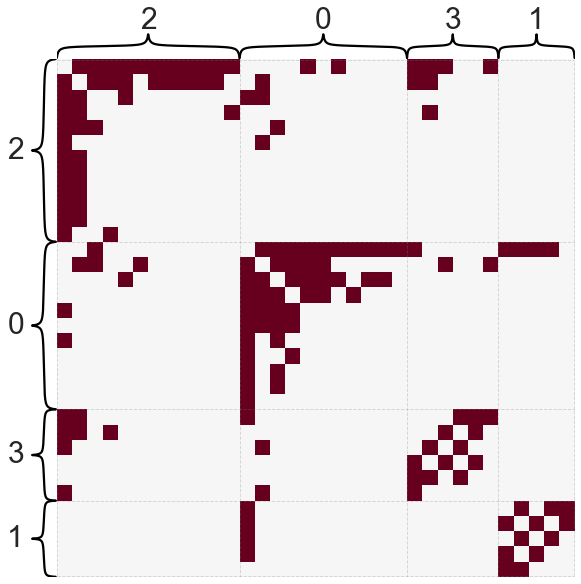

In [43]:
heatmap(A, inner_hier_labels=labels, sort_nodes=True, cbar=False)

## Plotting network layouts

Another common way to look at networks is via **network layouts**, sometimes called ball-and-stick diagrams or many other names. 

`NetworkX` has a few simple functions for drawing networks.

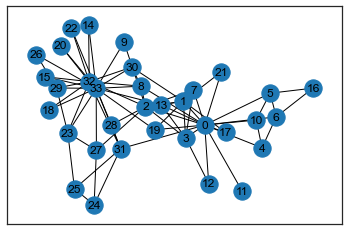

In [44]:
nx.draw_networkx(g)

We can use [`matplotlib`](https://matplotlib.org/) to make things look a little nicer.

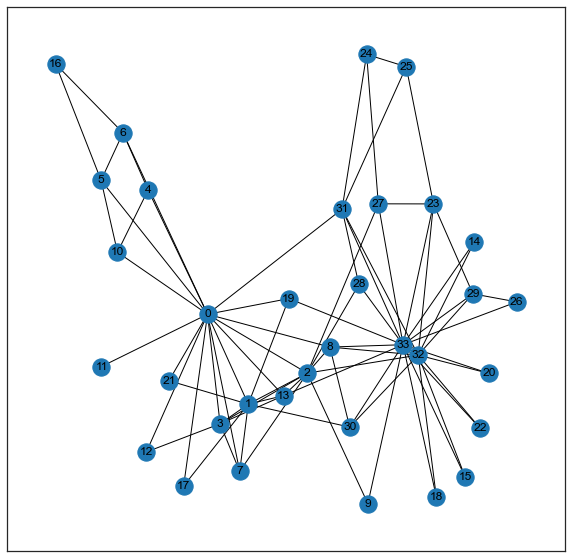

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,10))

nx.draw_networkx(g, ax=ax)

`NetworkX` has a few functions for computing nice-looking positions for each node - one of my favorites for 
small-ish networks is `kamada_kawai_layout`.

In [46]:
pos = nx.kamada_kawai_layout(g)
pos

{0: array([0.02595264, 0.33261791]),
 1: array([-0.15415403,  0.25105994]),
 2: array([ 0.07281129, -0.00339833]),
 3: array([0.15120782, 0.23250616]),
 4: array([0.19313543, 0.57445429]),
 5: array([0.1899636 , 0.67901702]),
 6: array([-0.00442196,  0.69195753]),
 7: array([0.28351952, 0.21023576]),
 8: array([-0.17565775, -0.00990143]),
 9: array([ 0.0706129 , -0.28925159]),
 10: array([0.37980825, 0.53262302]),
 11: array([-0.18776547,  0.6332519 ]),
 12: array([0.43374412, 0.37950472]),
 13: array([-0.0851201 ,  0.05268196]),
 14: array([-0.50006702, -0.31244434]),
 15: array([-0.46577851, -0.42902514]),
 16: array([0.15957838, 1.        ]),
 17: array([-0.279331  ,  0.51420533]),
 18: array([-0.39589977, -0.53439666]),
 19: array([-0.2753847 ,  0.06921985]),
 20: array([-0.293375  , -0.61554259]),
 21: array([-0.37319088,  0.43635094]),
 22: array([-0.15864175, -0.64280203]),
 23: array([ 0.23606483, -0.5155009 ]),
 24: array([ 0.57008117, -0.29665386]),
 25: array([ 0.54879029, -

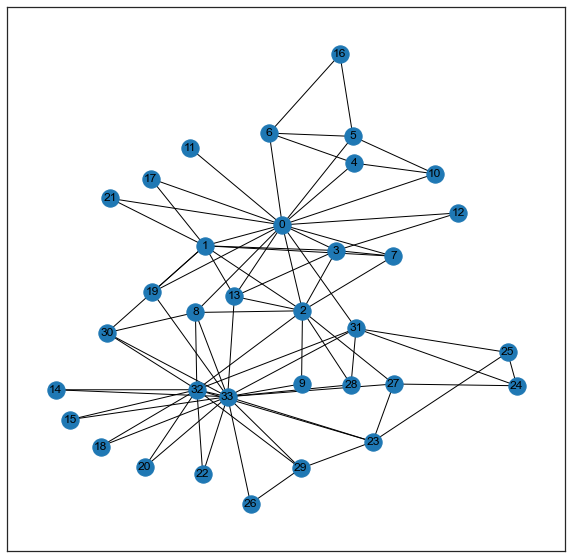

In [47]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

nx.draw_networkx(g, pos=pos, ax=ax)

![](networks-course/docs/images/temp-maggot-brain-umap-omni-hue_key=merge_class.png)